In [ ]:
import pandas as pd
import os

userFolder = "Data/Dataset/ALena"
condition = "nod"
sceneData = pd.read_table(os.path.join(userFolder, condition, "SceneData.tsv"), sep="\t", decimal=",")
sceneData

,Timestamp,EyeDataTimestamp,Main CameraPosX,Main CameraPosY,Main CameraPosZ,Main CameraForwardX,Main CameraForwardY,Main CameraForwardZ,Main CameraRotX,Main CameraRotY,...,robot5TargetForwardZ,robot5TargetRotX,robot5TargetRotY,robot5TargetRotZ,robot5TargetRotW,robot5TargetMT,FixatedObject,Round,Points,Msg
0,22.24792,0,0.438140,1.531988,1.365072,-0.429069,0.043974,-0.902201,-0.048080,0.974058,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,False,NoObjectFound,0,0,NaN
1,22.24792,0,0.432215,1.494543,1.320626,-0.207848,-0.163940,-0.964325,0.000704,0.991041,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,False,NoObjectFound,0,0,NaN
2,22.26792,1723117242881,0.441797,1.494784,1.325971,-0.162009,-0.172651,-0.971568,0.000133,0.992867,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,False,NoObjectFound,0,0,NaN
3,22.29224,1723117242899,0.443479,1.495791,1.326922,-0.154186,-0.166879,-0.973847,-0.000789,0.993440,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,False,NoObjectFound,0,0,NaN
4,22.30295,1723117242921,0.448532,1.498277,1.329693,-0.128874,-0.152542,-0.979858,-0.003436,0.994946,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,False,NoObjectFound,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55429,638.52500,1723117897805,0.038887,1.532887,-0.148171,0.813409,0.164055,0.558079,0.083328,-0.462620,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,False,NoObjectFound,17,111,NaN
55430,638.53690,1723117897815,0.039031,1.532871,-0.148160,0.813142,0.164144,0.558442,0.083384,-0.462413,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,False,NoObjectFound,17,111,NaN
55431,638.54730,1723117897827,0.039163,1.532825,-0.148129,0.813006,0.164299,0.558594,0.083488,-0.462313,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,False,NoObjectFound,17,111,NaN
55432,638.55830,1723117897837,0.039358,1.532805,-0.148063,0.813004,0.163959,0.558697,0.083282,-0.462294,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,False,NoObjectFound,17,111,NaN


In [17]:
import numpy as np

x = np.linspace(1, 20, 20)
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [3]:
sceneData.FixatedObject.unique()

array(['NoObjectFound', 'Wall3', 'NonMainTarget', 'Wall2', 'Wall4',
       'Floor', 'Wall1', 'MainTarget', 'robot4', 'robot5', 'robot2',
       'robot1', 'robot3', 'Roof'], dtype=object)

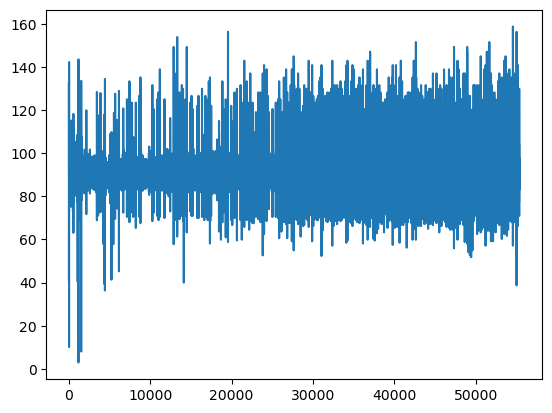

Median 90.09009009009822
Mean 90.20468713647695


In [4]:
import matplotlib.pyplot as plt
import numpy as np
t = sceneData.loc[sceneData.EyeDataTimestamp>0,"Timestamp"].to_numpy()
tDiff = np.diff(t)
fps = 1/tDiff
fps = fps[np.where(~np.isinf(fps))]
plt.plot(fps)
plt.show()
print("Median", np.median(fps))
print("Mean", np.nanmean(fps))

In [5]:
sceneData.Msg.unique()

array([nan, 'StartGame', 'Correct target selected',
       'Correct target selected | MainTargetDestroyed', 'EndGame',
       'Incorrect target selected',
       'Incorrect target selected | NonMaintargetDestroyed',
       'NonMaintargetDestroyed', 'MainTargetDestroyed'], dtype=object)

In [6]:
sceneData.loc[sceneData.loc[sceneData.Msg=="MainTargetDestroyed"].index-1, [x for x in sceneData.columns if "MT" in x]]

,robot1TargetMT,robot2TargetMT,robot3TargetMT,robot4TargetMT,robot5TargetMT
44394,False,False,False,True,False


In [7]:
sceneData.loc[~sceneData["Msg"].isna(), ["Timestamp", "Msg"]]

,Timestamp,Msg
4303,70.58897,StartGame
5234,80.97527,Correct target selected
5235,80.98438,Correct target selected
5236,80.99567,Correct target selected
5237,81.00679,Correct target selected
...,...,...
54805,631.58370,Correct target selected
54806,631.59490,Correct target selected
54807,631.60600,Correct target selected
54808,631.61720,Correct target selected | MainTargetDestroyed


In [8]:
gaze = pd.read_table(os.path.join(userFolder, condition, "gaze.csv"), sep = "\t", decimal=",")
gaze

,Timestamp,System Timestamp,Device Timestamp,Message,Message Type,Object Name,isValid,Local Gaze Origin X,Local Gaze Origin Y,Local Gaze Origin Z,...,Right World Gaze Origin Y,Right World Gaze Origin Z,Right World Gaze Direction X,Right World Gaze Direction Y,Right World Gaze Direction Z,Right Eye Openness,Right Eye Pupil Diameter,Right Eye Pupil Position X,Right Eye Pupil Position Y,Unnamed: 53
0,63858721242748,-1,-1,Condition nod started.,c0,-1,False,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
1,63858721242881,1723117242881,-1967791480,gaze sample,gs,-1,False,0.001000,-0.001000,-0.001000,...,1.495857,1.356861,0.000000,0.000000,0.000000,0.114108,-1.000000,0.533539,0.781089,NaN
2,63858721242899,1723117242899,-1967791463,gaze sample,gs,-1,False,0.001000,-0.001000,-0.001000,...,1.496360,1.360972,0.000000,0.000000,0.000000,0.201297,-1.000000,0.533539,0.783167,NaN
3,63858721242921,1723117242921,-1967791446,gaze sample,gs,-1,False,0.031995,-0.003889,-0.029841,...,1.497303,1.361572,-0.273324,-0.591405,-0.758628,0.197236,2.600388,0.529065,0.785188,NaN
4,63858721242931,1723117242931,-1967791430,gaze sample,gs,-1,False,0.001000,-0.001000,-0.001000,...,1.499084,1.363680,0.000000,0.000000,0.000000,0.205065,-1.000000,-1.000000,-1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55259,63858721897827,1723117897827,-1967136546,gaze sample,gs,-1,True,-0.002080,0.003921,-0.027779,...,1.528900,-0.191710,0.935455,-0.040906,0.351046,1.000000,4.389755,0.592876,0.524422,NaN
55260,63858721897837,1723117897837,-1967136538,gaze sample,gs,-1,True,-0.002343,0.003932,-0.027764,...,1.528842,-0.191687,0.934154,-0.034412,0.355188,1.000000,4.530548,0.592535,0.523544,NaN
55261,63858721897847,1723117897847,-1967136521,gaze sample,gs,-1,True,-0.001766,0.003908,-0.027798,...,1.528841,-0.191626,0.935281,-0.036991,0.351955,1.000000,4.474548,0.593216,0.523849,NaN
55262,63858721897855,-1,-1,Task finished,c0,-1,False,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN


In [9]:
gaze.iloc[:, 36]

0        False
1        False
2        False
3         True
4        False
         ...  
55259     True
55260     True
55261     True
55262    False
55263    False
Name: RightisValid, Length: 55264, dtype: bool

In [10]:
def is_float(value):
    if type(value) == float:
        return True
    value = value.replace(",", ".")
    try:
        float(value)
        return True
    except ValueError:
        return False



for x in gaze.iloc[:, 19]:
    if type(x) != bool:
        print(x)

In [11]:
type(x) == float

False

In [12]:


te = ["1", "-1", "0.23", "-0.0234", "bla"]
for t in te:
    print(t, is_float(t))

1 True
-1 True
0.23 True
-0.0234 True
bla False


In [13]:
gaze.loc[:, "Device Timestamp"].describe()

count    5.526400e+04
mean    -1.967303e+09
std      1.673881e+07
min     -1.967791e+09
25%     -1.967598e+09
50%     -1.967445e+09
75%     -1.967291e+09
max     -1.000000e+00
Name: Device Timestamp, dtype: float64

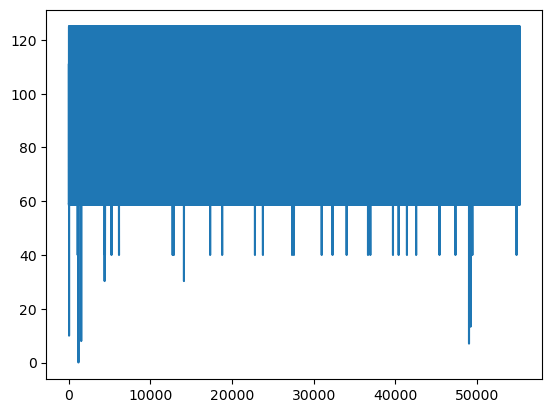

Median 111.1111111111111
Mean 100.0988748334874
Min TDiff 8
Median TDiff 9.0
Max tDiff 38991


In [14]:
import matplotlib.pyplot as plt
import numpy as np
t = gaze.loc[gaze.Message=="gaze sample", "Device Timestamp"].to_numpy()
tDiff = np.diff(t)
fps = 1/(tDiff*0.001)
fps = fps[np.where(~np.isinf(fps))]
plt.plot(fps)
plt.show()
print("Median", np.median(fps))
print("Mean", np.mean(fps))
print("Min TDiff", tDiff.min())
print("Median TDiff", np.median(tDiff))
print("Max tDiff", tDiff.max())

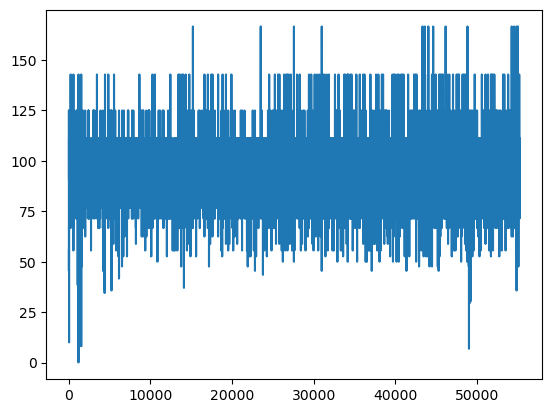

Median 90.90909090909092
Mean 90.64186954937026
Min TDiff 6
Median TDiff 11.0
Max tDiff 38991


In [15]:
import matplotlib.pyplot as plt
import numpy as np
t = gaze.loc[gaze.Message=="gaze sample", "System Timestamp"].to_numpy()
tDiff = np.diff(t)
fps = 1/(tDiff*0.001)
fps = fps[np.where(~np.isinf(fps))]
plt.plot(fps)
plt.show()
print("Median", np.median(fps))
print("Mean", np.mean(fps))
print("Min TDiff", tDiff.min())
print("Median TDiff", np.median(tDiff))
print("Max tDiff", tDiff.max())

In [16]:
gaze120 = pd.read_table(os.path.join(userFolder, condition, "gaze_120fps.csv"), sep = "\t", decimal=",")
gaze120

,Timestamp,System Timestamp,Device Timestamp,Message,Message Type,Object Name,isValid,Local Gaze Origin X,Local Gaze Origin Y,Local Gaze Origin Z,...,Right World Gaze Origin Y,Right World Gaze Origin Z,Right World Gaze Direction X,Right World Gaze Direction Y,Right World Gaze Direction Z,Right Eye Openness,Right Eye Pupil Diameter,Right Eye Pupil Position X,Right Eye Pupil Position Y,Unnamed: 53
0,63858721242748,-1,-1,Condition nod started.,c0,-1,False,-1.000000,-1.000000,-1.000000,...,-1,-1,-1,-1,-1,-1.0,-1.000000,-1.000000,-1.000000,NaN
1,63858721242754,1723117242748,-1967791596,gaze sample,gs,-1,False,0.001000,-0.001000,-0.001000,...,0,0,0,0,0,0.0,-1.000000,0.516262,0.810447,NaN
2,63858721242756,1723117242756,-1967791588,gaze sample,gs,-1,False,0.031974,-0.004266,-0.030043,...,0,0,0,0,0,0.0,3.045242,0.527470,0.806607,NaN
3,63858721242765,1723117242765,-1967791580,gaze sample,gs,-1,False,0.001000,-0.001000,-0.001000,...,0,0,0,0,0,0.0,-1.000000,0.538002,0.810447,NaN
4,63858721242773,1723117242773,-1967791571,gaze sample,gs,-1,False,0.032071,-0.004256,-0.030073,...,0,0,0,0,0,0.0,3.372131,0.537648,0.806607,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78510,63858721897835,1723117897835,-1967136521,gaze sample,gs,-1,True,-0.001766,0.003908,-0.027798,...,0,0,0,0,0,1.0,4.474548,0.593216,0.523849,NaN
78511,63858721897844,1723117897844,-1967136513,gaze sample,gs,-1,True,-0.001649,0.003903,-0.027805,...,0,0,0,0,0,1.0,4.445618,0.593699,0.524153,NaN
78512,63858721897852,1723117897852,-1967136505,gaze sample,gs,-1,True,-0.001587,0.003901,-0.027808,...,0,0,0,0,0,1.0,4.488220,0.593798,0.524165,NaN
78513,63858721897855,-1,-1,Task finished,c0,-1,False,-1.000000,-1.000000,-1.000000,...,-1,-1,-1,-1,-1,-1.0,-1.000000,-1.000000,-1.000000,NaN


In [17]:
def is_float(x):
    if type(x) == float:
        return True
    if type(x) == str:
        x = x.replace(",", ".")
        try:
            float(x)
            return True
        except:
            return False
    return False

for x in gaze120.iloc[:, 12]:
    if not is_float(x):
        print(x)

In [ ]:
float(gaze120.iloc[10,12].replace(",", "."))

0.9918213

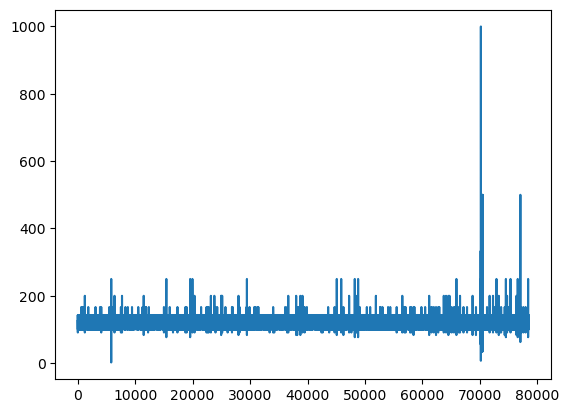

Median 125.0
Mean 120.88275643237321
Min TDiff 1
Median TDiff 8.0
Max TDiff 526


In [18]:
t = gaze120.loc[gaze120.Message=="gaze sample", "System Timestamp"].to_numpy()
tDiff = np.diff(t)
fps = 1/(tDiff*0.001)
fps = fps[np.where(~np.isinf(fps))]
plt.plot(fps)
plt.show()
print("Median", np.median(fps))
print("Mean", np.mean(fps))
print("Min TDiff", tDiff.min())
print("Median TDiff", np.median(tDiff))
print("Max TDiff", tDiff.max())

In [23]:
count_small  = np.sum(tDiff < 5)
len_data = len(tDiff)

print(f"{count_small = } {len_data = }")

count_small = 35 len_data = 78510


In [ ]:
roundData = pd.read_table(os.path.join(userFolder, condition, "RoundData.tsv"), sep="\t", decimal=",")
roundData

,Round,DegreeEnd,DegreeMove,GazeCorrection,StartDeviceTime,EndDeviceTime,Points,CorrectDestroyed,IncorrectDestroyed,EarlyStop
0,1,5,10,10,1723032736683,1723032744103,0,0,0,True
1,2,5,10,10,1723032784973,1723032814981,108,7,0,False
2,3,5,10,10,1723032816292,1723032846302,156,9,0,False
3,4,5,10,10,1723032853309,1723032883319,68,5,0,False
4,5,1,6,10,1723032920202,1723032926155,13,1,0,True
5,6,6,6,10,1723032937606,1723032967613,129,8,0,False
6,7,6,6,10,1723032975067,1723033005076,130,8,0,False
7,8,6,6,10,1723033008506,1723033038517,136,8,0,False
8,9,6,6,10,1723033042680,1723033072690,131,8,0,False
9,10,6,6,10,1723033073690,1723033103698,129,9,1,False


In [ ]:
%%time
t = None
results = dict()
for _, row in roundData.iterrows():
    if row.EarlyStop:
        continue
    dat = sceneData.loc[(sceneData.Round==row["Round"]) & ~sceneData.Msg.isna(), ["Timestamp", "Msg"]]
    results[row["Round"]] = {"Correct": row.CorrectDestroyed, "Incorrect": row.IncorrectDestroyed, "Points": row.Points}
    time_on_task = list()
    for _, rowDat in dat.iterrows():
        if rowDat.Msg == "StartGame":
            t = rowDat.Timestamp
        if rowDat.Msg == "MainTargetDestroyed":
            if t is not None:
                time_on_task.append(rowDat.Timestamp - t - 1) # -1 because each robot needs one second do arrive the destination
                t = rowDat.Timestamp
    results[row["Round"]]["MeanTimeOnTask"] = np.mean(time_on_task)
    results[row["Round"]]["StdTimeOnTask"] = np.std(time_on_task)
    results[row["Round"]]["TimeOnTask"] = time_on_task
pd.DataFrame(results).transpose()

CPU times: total: 15.6 ms
Wall time: 29.9 ms


,Correct,Incorrect,Points,MeanTimeOnTask,StdTimeOnTask,TimeOnTask
2,7,0,108,3.15854,1.13594,"[4.383400000000002, 3.7455599999999976, 3.1314..."
3,9,0,156,1.978911,0.838107,"[2.2764900000000026, 1.410020000000003, 1.2321..."
4,5,0,68,4.343602,2.928929,"[9.62481000000001, 4.885999999999996, 3.897900..."
6,8,0,129,2.697788,2.131873,"[1.6873000000000218, 7.807199999999995, 2.0657..."
7,8,0,130,2.655262,0.82491,"[2.4428999999999803, 3.2422000000000253, 1.943..."
8,8,0,136,2.172187,0.574709,"[2.409500000000037, 2.532299999999964, 0.96490..."
9,8,0,131,2.54015,1.583473,"[1.3100000000000023, 1.620999999999981, 6.5633..."
10,9,1,129,2.328133,1.03154,"[1.8654999999999973, 2.5313999999999623, 4.031..."
11,10,2,131,1.94759,0.883553,"[2.054300000000012, 1.732500000000016, 1.23189..."
12,8,2,91,2.390213,1.182838,"[1.5211000000000467, 1.9875999999999863, 1.676..."


In [ ]:
sceneData.loc[(sceneData.Round==2) & ~sceneData.Msg.isna()]

,Timestamp,EyeDataTimestamp,Main CameraPosX,Main CameraPosY,Main CameraPosZ,Main CameraForwardX,Main CameraForwardY,Main CameraForwardZ,Main CameraRotX,Main CameraRotY,...,robot5TargetForwardZ,robot5TargetRotX,robot5TargetRotY,robot5TargetRotZ,robot5TargetRotW,robot5TargetMT,FixatedObject,Round,Points,Msg
1624,31.17026,1723032784985,-0.175598,1.557374,0.240235,0.026494,0.064789,0.997547,0.032070,-0.014068,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,False,Wall3,2,0,StartGame
2109,36.55366,1723032790366,-0.197183,1.546864,0.027863,-0.977638,-0.050012,0.204261,-0.013901,0.630616,...,-0.278212,-0.179389,0.779054,0.257484,0.542767,False,NoObjectFound,2,13,MainTargetDestroyed
2536,41.29922,1723032795112,-0.175481,1.540536,0.006718,0.666054,-0.181363,0.723519,-0.081656,-0.362730,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,False,NoObjectFound,2,28,MainTargetDestroyed
2908,45.43068,1723032799245,-0.149890,1.552420,-0.015108,0.727807,0.057887,0.683334,0.033550,-0.396494,...,-0.837134,-0.033645,0.957828,0.256128,0.125822,False,NonMainTarget,2,44,MainTargetDestroyed
3175,48.39607,1723032802210,-0.153321,1.543868,0.000242,0.707081,-0.084554,0.702059,-0.038404,-0.384051,...,-0.984723,0.003711,0.996166,0.069126,-0.053481,False,NoObjectFound,2,61,MainTargetDestroyed
3357,50.41785,1723032804231,-0.153314,1.537750,-0.002917,0.772368,-0.133033,0.621087,-0.061194,-0.430943,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,False,NoObjectFound,2,80,MainTargetDestroyed
3805,55.39297,1723032809206,-0.299980,1.548179,-0.068940,-0.961752,0.008495,0.273790,0.000211,0.602582,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,False,NoObjectFound,2,94,MainTargetDestroyed
4245,60.28004,1723032814093,-0.274822,1.571658,-0.312275,-0.085718,0.156500,-0.983951,0.044468,0.994987,...,-0.645112,-0.032567,0.906364,-0.071092,-0.415198,False,NoObjectFound,2,108,MainTargetDestroyed
4326,61.18518,1723032815002,-0.346997,1.567467,-0.294601,-0.336999,0.111974,-0.934823,0.041013,0.982715,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,False,Wall4,2,108,EndGame


In [ ]:
files = os.listdir(os.path.join(userFolder, condition))
pd.read_table(os.path.join(userFolder, condition, [x for x in files if "TLX" in x][0]), sep=";")

,PlayerName,QuestionName,Value
0,TrissNod,tlx_MentalDemand,20
1,TrissNod,tlx_PhysicalDemand,40
2,TrissNod,tlx_TemporalDemand,30
3,TrissNod,tlx_Performance,20
4,TrissNod,tlx_Effort,40
5,TrissNod,tlx_Frustration,20


In [ ]:
from data import *
rec = Recording("Data/TestRecordings/ALena")
gvs = rec["nod"]["Gaze120"].loc[rec["nod"]["Gaze120"].Message=="gaze sample", ["Local Gaze Direction %s" % x for x in ["X", "Y", "Z"]]].to_numpy()
t = rec["nod"]["Gaze120"].loc[rec["nod"]["Gaze120"].Message=="gaze sample", "Device Timestamp"].to_numpy()
rec["nod"]["Gaze120"].loc[rec["nod"]["Gaze120"].Message=="gaze sample"].tail()

,Timestamp,System Timestamp,Device Timestamp,Message,Message Type,Object Name,isValid,Local Gaze Origin X,Local Gaze Origin Y,Local Gaze Origin Z,...,Right World Gaze Origin Y,Right World Gaze Origin Z,Right World Gaze Direction X,Right World Gaze Direction Y,Right World Gaze Direction Z,Right Eye Openness,Right Eye Pupil Diameter,Right Eye Pupil Position X,Right Eye Pupil Position Y,Unnamed: 53
78508,63858721897819,1723117897819,-1967136538,gaze sample,gs,-1,True,-0.002080,0.003921,-0.027779,...,0,0,0,0,0,1.0,4.389755,0.592876,0.524422,NaN
78509,63858721897827,1723117897827,-1967136530,gaze sample,gs,-1,True,-0.002343,0.003932,-0.027764,...,0,0,0,0,0,1.0,4.530548,0.592535,0.523544,NaN
78510,63858721897835,1723117897835,-1967136521,gaze sample,gs,-1,True,-0.001766,0.003908,-0.027798,...,0,0,0,0,0,1.0,4.474548,0.593216,0.523849,NaN
78511,63858721897844,1723117897844,-1967136513,gaze sample,gs,-1,True,-0.001649,0.003903,-0.027805,...,0,0,0,0,0,1.0,4.445618,0.593699,0.524153,NaN
78512,63858721897852,1723117897852,-1967136505,gaze sample,gs,-1,True,-0.001587,0.003901,-0.027808,...,0,0,0,0,0,1.0,4.488220,0.593798,0.524165,NaN


In [ ]:
from utils import * 
fixations = event_detection(gvs, t, 2, 300, 50)
rec["nod"]["Gaze120"]["Event"] = "Saccade"
for i, fix in enumerate(fixations):
    # print(i, fix)
    rec["nod"]["Gaze120"].loc[(rec["nod"]["Gaze120"]["Device Timestamp"] >= fix["StartTimestamp"]) & (rec["nod"]["Gaze120"]["Device Timestamp"] <= fix["EndTimestamp"]), "Event"] = f"Fixation_{i}"


In [ ]:
import time
time.time()

1723209834.9641066

In [ ]:
rec["nod"]["Gaze"]

,Timestamp,System Timestamp,Device Timestamp,Message,Message Type,Object Name,isValid,Local Gaze Origin X,Local Gaze Origin Y,Local Gaze Origin Z,...,Right World Gaze Origin Y,Right World Gaze Origin Z,Right World Gaze Direction X,Right World Gaze Direction Y,Right World Gaze Direction Z,Right Eye Openness,Right Eye Pupil Diameter,Right Eye Pupil Position X,Right Eye Pupil Position Y,Unnamed: 53
0,63858721242748,-1,-1,Condition nod started.,c0,-1,False,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
1,63858721242881,1723117242881,-1967791480,gaze sample,gs,-1,False,0.001000,-0.001000,-0.001000,...,1.495857,1.356861,0.000000,0.000000,0.000000,0.114108,-1.000000,0.533539,0.781089,NaN
2,63858721242899,1723117242899,-1967791463,gaze sample,gs,-1,False,0.001000,-0.001000,-0.001000,...,1.496360,1.360972,0.000000,0.000000,0.000000,0.201297,-1.000000,0.533539,0.783167,NaN
3,63858721242921,1723117242921,-1967791446,gaze sample,gs,-1,False,0.031995,-0.003889,-0.029841,...,1.497303,1.361572,-0.273324,-0.591405,-0.758628,0.197236,2.600388,0.529065,0.785188,NaN
4,63858721242931,1723117242931,-1967791430,gaze sample,gs,-1,False,0.001000,-0.001000,-0.001000,...,1.499084,1.363680,0.000000,0.000000,0.000000,0.205065,-1.000000,-1.000000,-1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55259,63858721897827,1723117897827,-1967136546,gaze sample,gs,-1,True,-0.002080,0.003921,-0.027779,...,1.528900,-0.191710,0.935455,-0.040906,0.351046,1.000000,4.389755,0.592876,0.524422,NaN
55260,63858721897837,1723117897837,-1967136538,gaze sample,gs,-1,True,-0.002343,0.003932,-0.027764,...,1.528842,-0.191687,0.934154,-0.034412,0.355188,1.000000,4.530548,0.592535,0.523544,NaN
55261,63858721897847,1723117897847,-1967136521,gaze sample,gs,-1,True,-0.001766,0.003908,-0.027798,...,1.528841,-0.191626,0.935281,-0.036991,0.351955,1.000000,4.474548,0.593216,0.523849,NaN
55262,63858721897855,-1,-1,Task finished,c0,-1,False,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN


In [ ]:
rec["nod"]["Gaze120"].loc[:,["Timestamp", "Device Timestamp", "Event"]]

,Timestamp,Device Timestamp,Event
0,63858721242748,-1,Saccade
1,63858721242754,-1967791596,Saccade
2,63858721242756,-1967791588,Saccade
3,63858721242765,-1967791580,Saccade
4,63858721242773,-1967791571,Saccade
...,...,...,...
78510,63858721897835,-1967136521,Saccade
78511,63858721897844,-1967136513,Saccade
78512,63858721897852,-1967136505,Saccade
78513,63858721897855,-1,Saccade


In [ ]:
rec["nod"]["Gaze120"].Event.unique()

array(['Saccade', 'Fixation_0', 'Fixation_1', ..., 'Fixation_3289',
       'Fixation_3290', 'Fixation_3291'], dtype=object)

In [ ]:
for i, fix in enumerate(fixations):
    print(i, fix)

0 {'StartIdx': 41, 'EndIdx': 49, 'Duration': 75, 'StartTimestamp': -1967791255, 'EndTimestamp': -1967791180}
1 {'StartIdx': 52, 'EndIdx': 63, 'Duration': 100, 'StartTimestamp': -1967791163, 'EndTimestamp': -1967791063}
2 {'StartIdx': 67, 'EndIdx': 81, 'Duration': 125, 'StartTimestamp': -1967791038, 'EndTimestamp': -1967790913}
3 {'StartIdx': 82, 'EndIdx': 92, 'Duration': 92, 'StartTimestamp': -1967790913, 'EndTimestamp': -1967790821}
4 {'StartIdx': 101, 'EndIdx': 113, 'Duration': 109, 'StartTimestamp': -1967790755, 'EndTimestamp': -1967790646}
5 {'StartIdx': 114, 'EndIdx': 133, 'Duration': 166, 'StartTimestamp': -1967790646, 'EndTimestamp': -1967790480}
6 {'StartIdx': 134, 'EndIdx': 149, 'Duration': 134, 'StartTimestamp': -1967790480, 'EndTimestamp': -1967790346}
7 {'StartIdx': 150, 'EndIdx': 161, 'Duration': 100, 'StartTimestamp': -1967790346, 'EndTimestamp': -1967790246}
8 {'StartIdx': 222, 'EndIdx': 229, 'Duration': 67, 'StartTimestamp': -1967789747, 'EndTimestamp': -1967789680}
9 {

In [ ]:
from data import *

rec = Recording("Data/TestRecordings/Alena")
rec.calc_events("nod")

In [ ]:
final_rounds = rec.get_final_rounds("nod")
row = final_rounds.iloc[3]
gazeData = rec["nod"]["Gaze120"]
gaze_data_round = gazeData.loc[(gazeData["System Timestamp"] > row.StartDeviceTime) & (gazeData["System Timestamp"] < row.EndDeviceTime)]
fixation_count = len(gaze_data_round.Event.unique()) - 1
mean_fixation_duration = gaze_data_round.loc[:, ["Event", "Device Timestamp"]].query("Event != 'Saccade'").groupby("Event").agg({'Device Timestamp': lambda x: x.iloc[-1] - x.iloc[0]}).mean()["Device Timestamp"]
mean_fixation_duration

111.64071856287426

In [ ]:
"Event" in gazeData.columns

True

In [ ]:
sceneData = rec["nod"]["SceneData"]
sceneData.loc[(sceneData.EyeDataTimestamp > row.StartDeviceTime) & (sceneData.EyeDataTimestamp < row.EndDeviceTime)]

,Timestamp,EyeDataTimestamp,Main CameraPosX,Main CameraPosY,Main CameraPosZ,Main CameraForwardX,Main CameraForwardY,Main CameraForwardZ,Main CameraRotX,Main CameraRotY,...,robot5TargetForwardZ,robot5TargetRotX,robot5TargetRotY,robot5TargetRotZ,robot5TargetRotW,robot5TargetMT,FixatedObject,Round,Points,Msg
34322,404.0851,1723117663364,0.212616,1.494684,-0.213500,0.525389,-0.149471,-0.837630,0.096209,0.953708,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,False,robot2,11,0,StartGame
34323,404.0963,1723117663374,0.212556,1.494589,-0.214243,0.522628,-0.150781,-0.839121,0.096156,0.954104,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,False,robot2,11,0,NaN
34324,404.1082,1723117663386,0.212549,1.494509,-0.215006,0.520114,-0.152015,-0.840460,0.095843,0.954486,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,False,robot2,11,0,NaN
34325,404.1187,1723117663398,0.212497,1.494347,-0.215708,0.517639,-0.153733,-0.841675,0.095379,0.954851,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,False,robot2,11,0,NaN
34326,404.1295,1723117663408,0.212504,1.494153,-0.216437,0.514973,-0.155677,-0.842952,0.094984,0.955225,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,False,robot2,11,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37018,434.0276,1723117693307,0.101722,1.542127,-0.154809,-0.337901,0.287376,-0.896235,0.095065,0.969062,...,-0.789547,0.033744,0.945323,0.103792,-0.307333,False,NonMainTarget,11,112,NaN
37019,434.0385,1723117693316,0.102363,1.541643,-0.155250,-0.332399,0.283264,-0.899596,0.094802,0.969954,...,-0.789789,0.033689,0.945388,0.103684,-0.307173,False,NonMainTarget,11,112,NaN
37020,434.0495,1723117693328,0.102864,1.541131,-0.155738,-0.326891,0.279344,-0.902834,0.094613,0.970807,...,-0.790046,0.033635,0.945458,0.103585,-0.306997,False,NonMainTarget,11,112,NaN
37021,434.0608,1723117693338,0.103522,1.540629,-0.156210,-0.321419,0.275386,-0.906009,0.094133,0.971671,...,-0.790284,0.033579,0.945523,0.103473,-0.306841,False,NonMainTarget,11,112,NaN


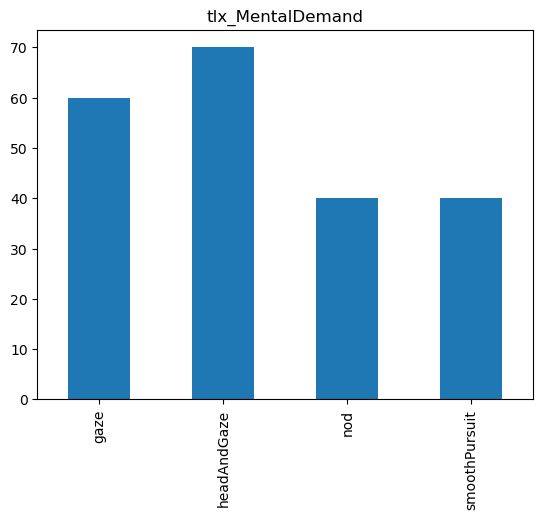

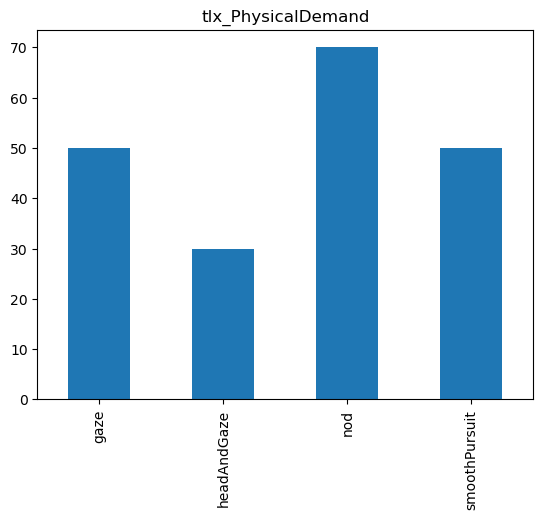

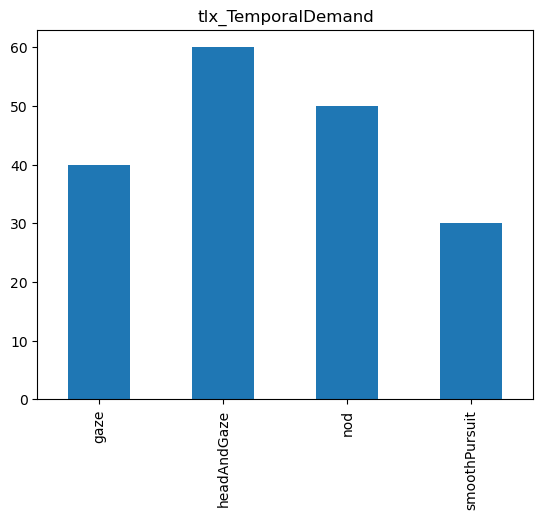

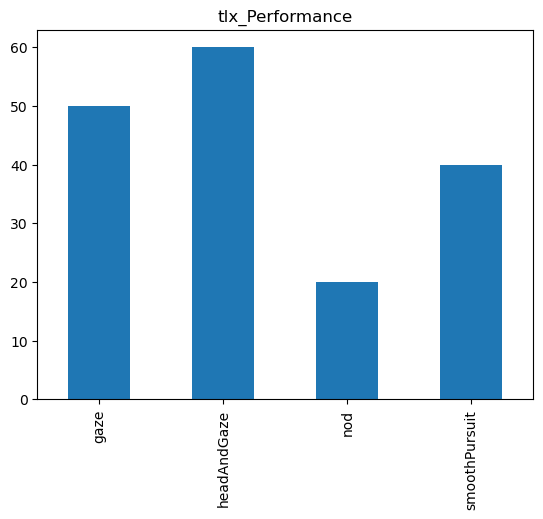

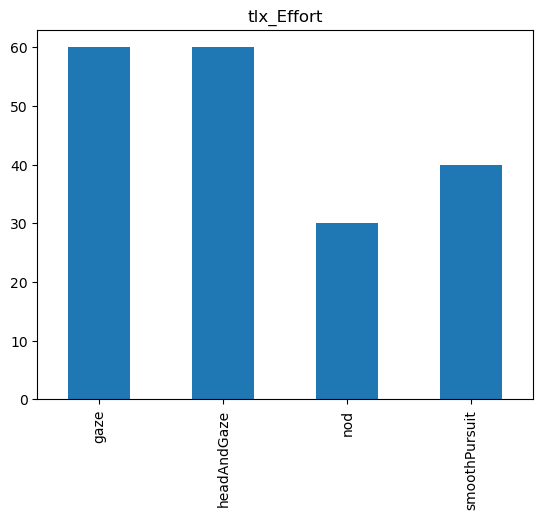

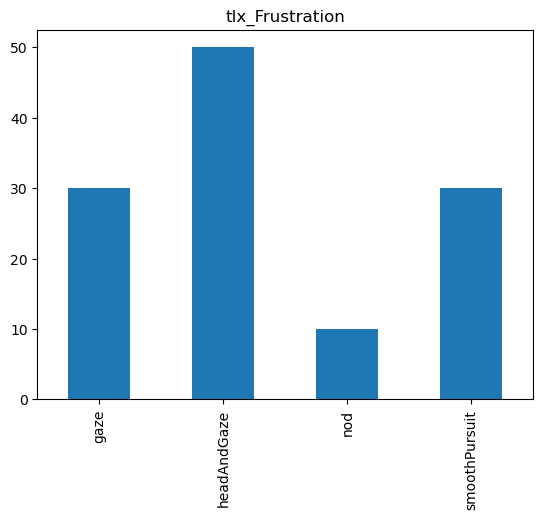

In [ ]:
import pandas as pd
import os
from data import Recording
import matplotlib.pyplot as plt
answers = dict()
# path = "Data/TestRecordings/ALena/nod/08_08_2024_13-53-26_TLX_ALena.csv"
path = "Data/TestRecordings/Alena"
condition = "nod"
for condition in Recording.conditions:
    file = [x for x in os.listdir(os.path.join(path, condition)) if "TLX" in x][0]
    te = pd.read_csv(os.path.join(path, condition, file), sep=";")
    answers[condition] = dict()
    for _, row in te.iterrows():
        answers[condition][row.QuestionName] = row.Value
for index, row in pd.DataFrame(answers).iterrows():
    row.plot(kind="bar", title=index)
    plt.show()

In [1]:
import numpy as np

np.tan(np.deg2rad(10))

0.17632698070846498

In [4]:
costs = {
    'Tank': {'Value': 43.15, 'Member': ["Bjoern", "Anna-Lena", "Yannick", "Rajat", "Alex"]},
    'Camping': {'Value': 114.5, 'Member': ["Bjoern", "Anna-Lena", "Yannick", "Rajat", "Alex"]},
    'Shop': {'Value': 55.95, 'Member': ["Bjoern", "Anna-Lena", "Yannick", "Rajat", "Alex", "Nora", "Kai"]}
}

to_pay = dict()

for c in costs:
    value = costs[c]['Value'] / len(costs[c]['Member'])
    for m in costs[c]['Member']:
        if m in to_pay.keys():
            to_pay[m] += value
        else:
            to_pay[m] = value

to_pay

{'Bjoern': 39.52285714285714,
 'Anna-Lena': 39.52285714285714,
 'Yannick': 39.52285714285714,
 'Rajat': 39.52285714285714,
 'Alex': 39.52285714285714,
 'Nora': 7.992857142857143,
 'Kai': 7.992857142857143}

In [9]:
start_ms = 104545
end_ms = 222589

frames_count = 8599
print('Time', (end_ms-start_ms)/1000/60, "min")
print('FPS', frames_count/((end_ms - start_ms)/1000))

Time 1.9674 min
FPS 72.84571854562705


In [1]:
import data

path = "Data/TestSubDataset"

recs = data.Recordings(path)

f:\Python\GazeBasedSelection\data.py:26: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  scene_data = pd.read_table(os.path.join(path, condition, "SceneData.tsv"), sep="\t", decimal=",")
f:\Python\GazeBasedSelection\data.py:26: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  scene_data = pd.read_table(os.path.join(path, condition, "SceneData.tsv"), sep="\t", decimal=",")
f:\Python\GazeBasedSelection\data.py:26: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  scene_data = pd.read_table(os.path.join(path, condition, "SceneData.tsv"), sep="\t", decimal=",")
f:\Python\GazeBasedSelection\data.py:26: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  scene_data = pd.read_table(os.path.join(path, condition, "SceneData.tsv"), sep="\t", decimal=",")
f:\Python\GazeBasedSelection

In [2]:
df = recs[2]["answers"]

(df - df.mean()) / df.std()

,gaze,headAndGaze,nod,smoothPursuit
tlx_MentalDemand,-1.101378,-0.612971,-1.047570,-1.19646
tlx_PhysicalDemand,-1.101378,0.459728,0.080582,-1.19646
tlx_TemporalDemand,0.650814,-0.076621,-0.483494,0.66470
tlx_Performance,-0.400501,-1.685671,-1.047570,-0.26588
tlx_Effort,-0.400501,0.459728,0.080582,-0.26588
tlx_Frustration,1.351691,-0.076621,0.644658,1.12999
parameters,1.001252,1.532428,1.772811,1.12999


In [4]:
import pandas as pd
dat = pd.read_csv("Data/Dataset/pat_data.csv", sep="\t", decimal=",", index_col=0)
dat.loc["Pat001"]

Age                          24
Gender                   Female
VRExperience              False
ETExperience               True
PreferedMethod             Gaze
VisualAid         ContactLenses
Name: Pat001, dtype: object

In [1]:
import data
import warnings
warnings.filterwarnings("ignore")
recs = data.Recordings("Data/Dataset")


100%|██████████| 43/43 [04:29<00:00,  6.27s/it]


In [7]:
recs.get_final_parameters("nod")

{'DegreeEnd': [7,
  8,
  1,
  2,
  5,
  2,
  5,
  3,
  5,
  1,
  4,
  4,
  3,
  5,
  1,
  7,
  1,
  5,
  5,
  4,
  3,
  4,
  5,
  3,
  7,
  1,
  3,
  1,
  6,
  1,
  5,
  5,
  5,
  3,
  8,
  5,
  5,
  6,
  4,
  3,
  1,
  9,
  4],
 'DegreeMove': [10,
  8,
  5,
  6,
  6,
  5,
  10,
  6,
  10,
  5,
  10,
  9,
  7,
  8,
  5,
  9,
  5,
  5,
  13,
  7,
  9,
  5,
  10,
  9,
  7,
  5,
  6,
  5,
  8,
  5,
  10,
  10,
  10,
  5,
  8,
  8,
  7,
  8,
  7,
  7,
  5,
  10,
  7],
 'Paticipant': ['Pat001',
  'Pat002',
  'Pat003',
  'Pat004',
  'Pat005',
  'Pat006',
  'Pat007',
  'Pat008',
  'Pat009',
  'Pat010',
  'Pat011',
  'Pat012',
  'Pat013',
  'Pat014',
  'Pat015',
  'Pat016',
  'Pat017',
  'Pat018',
  'Pat019',
  'Pat020',
  'Pat021',
  'Pat022',
  'Pat023',
  'Pat024',
  'Pat025',
  'Pat026',
  'Pat027',
  'Pat028',
  'Pat029',
  'Pat030',
  'Pat031',
  'Pat032',
  'Pat033',
  'Pat034',
  'Pat035',
  'Pat036',
  'Pat037',
  'Pat038',
  'Pat039',
  'Pat040',
  'Pat041',
  'Pat042',
  'Pat043']}

In [4]:
recs.pat_data

,Age,Gender,VRExperience,ETExperience,PreferedMethod,VisualAid
Pat001,24,Female,False,True,Gaze,ContactLenses
Pat002,25,Female,True,True,Nod,No
Pat003,20,Male,True,False,Head and gaze,No
Pat004,32,Male,False,False,Head and gaze,Glasses
Pat005,34,Female,True,True,Head and gaze,No
Pat006,20,Male,False,False,Nod,No
Pat007,38,Male,True,False,Nod,No
Pat008,19,Male,False,False,Gaze,No
Pat009,22,Female,False,False,Head and gaze,No
Pat010,19,Male,False,False,Nod,No


In [3]:
recs[[1, 2, "Pat005"]]

[Recording of Pat002; Age 25; Gender Female; ET experience True; VR experience True; Visual Aid No; Preferred method Nod.,
 Recording of Pat003; Age 20; Gender Male; ET experience False; VR experience True; Visual Aid No; Preferred method Head and gaze.,
 Recording of Pat005; Age 34; Gender Female; ET experience True; VR experience True; Visual Aid No; Preferred method Head and gaze.]

In [3]:
from scipy.stats import ttest_ind_from_stats

ttest_ind_from_stats(2.109307, 0.710648, 1513, 2.188826, 0.682330, 2641)

Ttest_indResult(statistic=-3.559985825671156, pvalue=0.0003750291399607349)

In [7]:
import os

path = "Data/Dataset"
pats = [p for p in os.listdir(path) if "." not in p]

for p in pats:
    pat_path = os.path.join(path, p)
    conditions = [f for f in os.listdir(pat_path) if "." not in f]
    for c in conditions:
        cond_path = os.path.join(pat_path, c)
        event_files = [f for f in os.listdir(cond_path) if "event" in f]
        print(event_files)
        for f in event_files:
            event_file = os.path.join(cond_path, f)
            os.remove(event_file)

['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_event.csv']
['gaze_120fps_event.csv', 'gaze_

In [ ]:
import numpy as np
cond = "nod"
f = 62
a = 200
b = 500
fps = 90

angles_correct = np.load(f"Data/Dataset_Prepare/angles_fps{fps}_{cond}_Correct_f{f}_b{b}_a{a}.npy")
angles_incorrect = np.load(f"Data/Dataset_Prepare/angles_fps{fps}_{cond}_Incorrect_f{f}_b{b}_a{a}.npy")
names_correct = np.load(f"Data/Dataset_Prepare/names_fps{fps}_{cond}_Correct_f{f}_b{b}_a{a}.npy")
names_incorrect = np.load(f"Data/Dataset_Prepare/names_fps{fps}_{cond}_Incorrect_f{f}_b{b}_a{a}.npy")
pat_names = np.unique(names_correct)
n = int(0.7 * len(pat_names))
train_pats = pat_names[:n]
test_pats = pat_names[n:]
train_angles = angles_correct[np.isin(names_correct, train_pats)]
test_correct = angles_correct[np.isin(names_correct, test_pats)]
test_incorrect = angles_incorrect[np.isin(names_incorrect, test_pats)]

In [3]:
train_angles.shape

(6922, 61)

In [1]:
import torch
te = [
    torch.rand(20),
    torch.rand(10)
]
torch.concat(te)

tensor([0.3264, 0.1510, 0.1697, 0.0048, 0.7034, 0.3107, 0.9846, 0.0165, 0.2723,
        0.2538, 0.6993, 0.9923, 0.6248, 0.1063, 0.4533, 0.2316, 0.3026, 0.0206,
        0.4391, 0.8106, 0.7808, 0.4096, 0.7470, 0.8705, 0.3242, 0.5303, 0.5404,
        0.3488, 0.6894, 0.5605])

In [2]:
import torch
from torch import nn

lstm = nn.LSTM(input_size=1,
               hidden_size=20,
               num_layers=3,
               batch_first=True)

fc = nn.Linear(20, 1)
tensor = torch.randn(30, 84, 1)

out, (last_h, last_c) = lstm(tensor)
out_dec = fc(out)

print(f"{out.shape=}; {last_h.shape=}; {last_c.shape=}")
print(f"{out_dec.shape=}")

out.shape=torch.Size([30, 84, 20]); last_h.shape=torch.Size([3, 30, 20]); last_c.shape=torch.Size([3, 30, 20])
out_dec.shape=torch.Size([30, 84, 1])


In [3]:
",".join(["jo", "bla", "geht", "so"])

'jo,bla,geht,so'

In [6]:
import pandas as pd
pd.read_csv("AutoEncoder/HyperparameterResults_All/results_log.csv")

,model,cond,hidden_size,num_channels,kernel_size,latent_dim,learning_rate,count_parameter,correct_acc,incorrect_acc
0,TCN_VAE_0,gaze,na,"[8, 16, 32]",3,16,0.001,99811,0.982863,0.603448
1,LSTMAE_1,gaze,20,na,na,16,0.001,5897,0.974019,0.879310
2,LSTMAE_small_2,gaze,20,na,na,na,0.001,5221,0.972913,0.862069
3,TCNAE_3,gaze,na,"[8, 16, 32]",3,16,0.001,68563,0.718076,0.931034
4,LSTM_VAE_4,gaze,20,na,na,16,0.001,4713,0.982863,0.603448
5,TCN_VAE_5,headAndGaze,na,"[8, 16, 32]",3,16,0.001,99811,0.941874,0.888889
6,LSTMAE_6,headAndGaze,20,na,na,16,0.001,5897,0.926453,0.888889
7,LSTMAE_small_7,headAndGaze,20,na,na,na,0.001,5221,0.916370,0.888889
8,TCNAE_8,headAndGaze,na,"[8, 16, 32]",3,16,0.001,68563,0.746145,0.925926
9,LSTM_VAE_9,headAndGaze,20,na,na,16,0.001,4713,0.940688,0.888889


In [10]:
from itertools import product

# Example dictionary
d = {
    "a": [[1, 2], [2, 2]],
    "x": [1, 2],
    "y": ['a', 'b'],
    "z": [True, False]
}

# Specify the keys you want to combine
keys_to_combine = ["y", "x", "a", "z"]

# Use itertools.product to generate combinations
combinations = list(product(*(d[key] for key in keys_to_combine)))

print(combinations)


[('a', 1, [1, 2], True), ('a', 1, [1, 2], False), ('a', 1, [2, 2], True), ('a', 1, [2, 2], False), ('a', 2, [1, 2], True), ('a', 2, [1, 2], False), ('a', 2, [2, 2], True), ('a', 2, [2, 2], False), ('b', 1, [1, 2], True), ('b', 1, [1, 2], False), ('b', 1, [2, 2], True), ('b', 1, [2, 2], False), ('b', 2, [1, 2], True), ('b', 2, [1, 2], False), ('b', 2, [2, 2], True), ('b', 2, [2, 2], False)]


In [26]:
import numpy as np
cond = "nod"
f = 62
a = 200
b = 500
fps = 90
conditions = ["gaze", "headAndGaze", "nod"]
cv_folds = 7
# for cv_folds in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
for cond in conditions:
    angles_correct = np.load(f"Data/Dataset_Prepare/angles_fps{fps}_{cond}_Correct_f{f}_b{b}_a{a}.npy")
    angles_incorrect = np.load(f"Data/Dataset_Prepare/angles_fps{fps}_{cond}_Incorrect_f{f}_b{b}_a{a}.npy")
    names_correct = np.load(f"Data/Dataset_Prepare/names_fps{fps}_{cond}_Correct_f{f}_b{b}_a{a}.npy")
    names_incorrect = np.load(f"Data/Dataset_Prepare/names_fps{fps}_{cond}_Incorrect_f{f}_b{b}_a{a}.npy")
    pat_names = np.unique(names_correct)
    n = int(0.7 * len(pat_names))
    train_pats = pat_names[:n]
    test_pats = pat_names[n:]
    train_angles = angles_correct[np.isin(names_correct, train_pats)]
    test_correct = angles_correct[np.isin(names_correct, test_pats)]
    test_incorrect = angles_incorrect[np.isin(names_incorrect, test_pats)]
    n_fold = int(len(train_pats)/cv_folds)
    dat = list()
    for i in range(cv_folds):
        dat.append(train_pats[i*n_fold:(i+1)*n_fold])
print(dat)
for d in dat:
    print(len(d))

[array(['Pat001', 'Pat002', 'Pat003', 'Pat004', 'Pat005'], dtype='<U6'), array(['Pat006', 'Pat007', 'Pat008', 'Pat009', 'Pat010'], dtype='<U6'), array(['Pat011', 'Pat012', 'Pat013', 'Pat014', 'Pat015'], dtype='<U6'), array(['Pat016', 'Pat017', 'Pat018', 'Pat019', 'Pat020'], dtype='<U6'), array(['Pat021', 'Pat022', 'Pat023', 'Pat024', 'Pat025'], dtype='<U6'), array(['Pat026', 'Pat027', 'Pat028', 'Pat029', 'Pat030'], dtype='<U6'), array(['Pat031', 'Pat032', 'Pat033', 'Pat034', 'Pat035'], dtype='<U6')]
5
5
5
5
5
5
5


In [10]:
test_correct == angles_correct[~np.isin(names_correct, train_pats)]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])